<a href="https://colab.research.google.com/github/Maverick139/covid-compartmental-model/blob/master/seir_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
!pip install mpld3
# import mpld3
# mpld3.enable_notebook()

     |████████████████████████████████| 1.0MB 2.9MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.1-cp36-none-any.whl size=364065 sha256=e3bdd99c746038153497339d358bf7b6afb51df4224775e65aec23c069ce6056
  Stored in directory: /root/.cache/pip/wheels/38/68/06/d119af6c3f9a2d1e123c1f72d276576b457131b3a7bf94e402
Successfully built mpld3


In [6]:
def deriv(y, t, N, beta, gamma, delta, zeta):
    S, E, I, R = y
    dSdt = -(delta * S * E / N) - (beta * S * I / N)
    dEdt = (delta * S * E / N) + (beta * S * I / N) - (zeta * E) 
    dIdt = -(gamma * I) + (zeta * E)
    dRdt = (gamma * I)
    return dSdt, dEdt, dIdt, dRdt

In [23]:
N = 1e9
beta = 1.1  # infected person infects 'beta' other person per day
delta = 1.4 # exposed person infects 'delta' other person per day
Inc = 5 # incubation period in days
zeta = 1/Inc  # exposed person takes 'Inc' days to become infected (show symptoms)
D = 14.0 # infections lasts 'D' days
gamma = 1.0 / D

S0, E0, I0, R0 = 1e9, 0, 1, 0  # initial conditions: one infected, rest susceptible

In [24]:
t = np.linspace(0, 99, 200) # Grid of time points (in days)
y0 = S0, E0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, zeta))
S, E, I, R = ret.T

In [27]:
def plotsir(t, S, E, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b',  linewidth=2, label='Susceptible')
  ax.plot(t, E, 'r',  linewidth=2, label='Exposed')
  ax.plot(t, I, 'y',  linewidth=2, label='Infected')
  ax.plot(t, E+I, 'black',  linewidth=2, label='Contracted')
  ax.plot(t, R, 'g',  linewidth=2, label='Recovered')
  plt.plot()

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show()

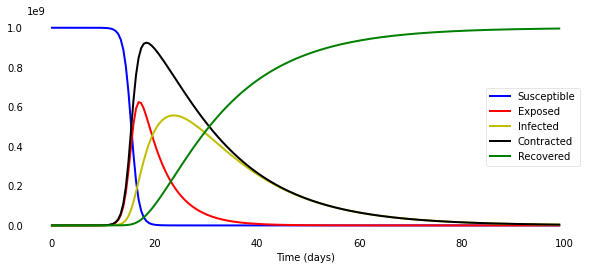

In [28]:
plotsir(t, S, E, I, R)